In [2]:
pip install pandas matplotlib seaborn

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv("space_missions.csv", encoding="ISO-8859-1")
df.head()

,Company,Location,Date,Time,Rocket,Mission,RocketStatus,Price,MissionStatus
0,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-10-04,19:28:00,Sputnik 8K71PS,Sputnik-1,Retired,NaN,Success
1,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03,02:30:00,Sputnik 8K71PS,Sputnik-2,Retired,NaN,Success
2,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1957-12-06,16:44:00,Vanguard,Vanguard TV3,Retired,NaN,Failure
3,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-02-01,03:48:00,Juno I,Explorer 1,Retired,NaN,Success
4,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-02-05,07:33:00,Vanguard,Vanguard TV3BU,Retired,NaN,Failure


In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4630 entries, 0 to 4629
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company        4630 non-null   object
 1   Location       4630 non-null   object
 2   Date           4630 non-null   object
 3   Time           4503 non-null   object
 4   Rocket         4630 non-null   object
 5   Mission        4630 non-null   object
 6   RocketStatus   4630 non-null   object
 7   Price          1265 non-null   object
 8   MissionStatus  4630 non-null   object
dtypes: object(9)
memory usage: 325.7+ KB


In [9]:
df.describe()


,Company,Location,Date,Time,Rocket,Mission,RocketStatus,Price,MissionStatus
count,4630,4630,4630,4503,4630,4630,4630,1265,4630
unique,62,158,4180,1300,370,4556,2,65,4
top,RVSN USSR,"Site 31/6, Baikonur Cosmodrome, Kazakhstan",1962-04-26,12:00:00,Cosmos-3M (11K65M),Demo Flight,Retired,450,Success
freq,1777,251,4,52,446,8,3620,136,4162


In [10]:
df.columns

Index(['Company', 'Location', 'Date', 'Time', 'Rocket', 'Mission',
       'RocketStatus', 'Price', 'MissionStatus'],
      dtype='object')

In [11]:

df.isnull().sum()

,0
Company,0
Location,0
Date,0
Time,127
Rocket,0
Mission,0
RocketStatus,0
Price,3365
MissionStatus,0


In [13]:
df['MissionStatus'].unique()

array(['Success', 'Failure', 'Partial Failure', 'Prelaunch Failure'],
      dtype=object)

In [14]:
df['MissionStatus'] = df['MissionStatus'].str.lower().str.strip()


In [15]:
# Convert launch date to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')



In [16]:
# Drop rows with missing dates or status
df = df.dropna(subset=['Date', 'MissionStatus'])

In [31]:
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
df['Price'] = df['Price'].fillna(0)

In [18]:
total_missions = df.shape[0]
print("Total Missions:", total_missions)

Total Missions: 4630


In [23]:
print("Company:", df['Company'].nunique())

Company: 62


In [21]:
print(df['MissionStatus'].value_counts())

MissionStatus
success              4162
failure               357
partial failure       107
prelaunch failure       4
Name: count, dtype: int64


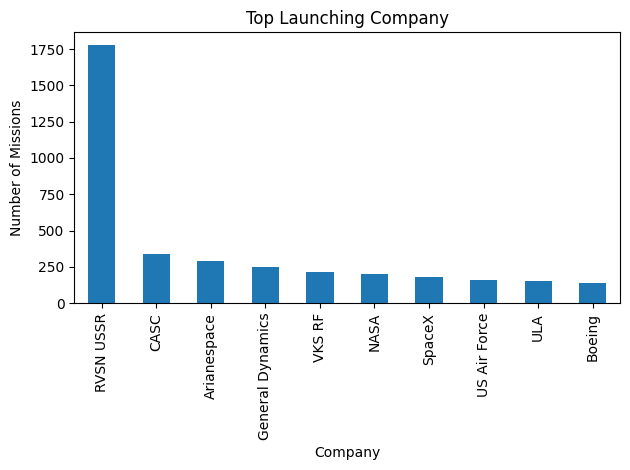

In [25]:
top_countries = df['Company'].value_counts().head(10)
top_countries.plot(kind='bar', title='Top Launching Company')
plt.xlabel("Company")
plt.ylabel("Number of Missions")
plt.tight_layout()
plt.show()

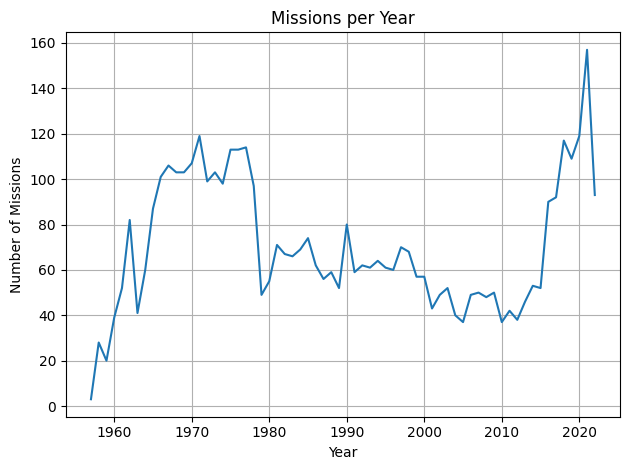

In [27]:
df['year'] = df['Date'].dt.year
missions_per_year = df.groupby('year').size()
missions_per_year.plot(kind='line', title='Missions per Year')
plt.xlabel("Year")
plt.ylabel("Number of Missions")
plt.grid(True)
plt.tight_layout()
plt.show()

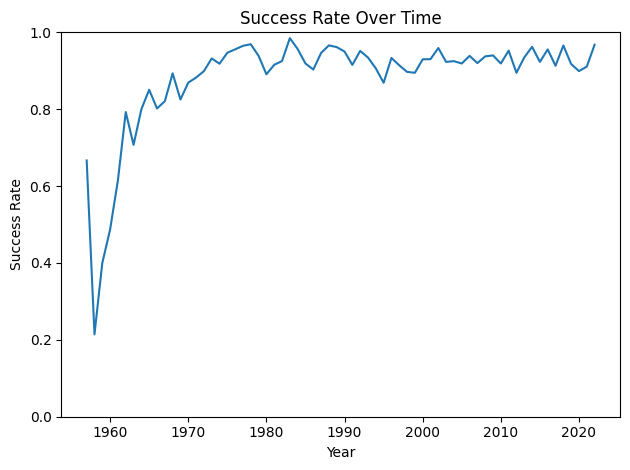

In [28]:
success_over_time = df[df['MissionStatus'] == 'success'].groupby('year').size()
total_over_time = df.groupby('year').size()

success_rate = (success_over_time / total_over_time).fillna(0)

success_rate.plot(title="Success Rate Over Time")
plt.ylabel("Success Rate")
plt.xlabel("Year")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

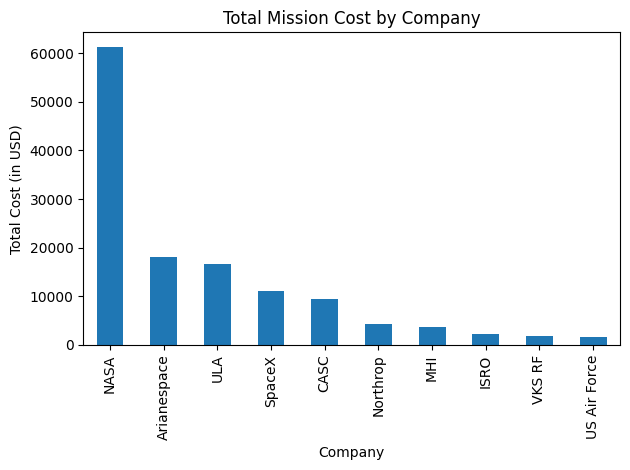

In [32]:
cost_by_company = df.groupby('Company')['Price'].sum().sort_values(ascending=False).head(10)
cost_by_company.plot(kind='bar', title="Total Mission Cost by Company")
plt.ylabel("Total Cost (in USD)")
plt.tight_layout()
plt.show()